전체 샘플 수: 569
feature 수: 30


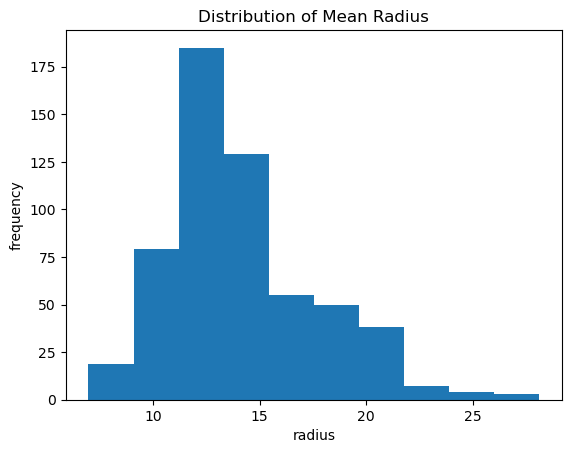

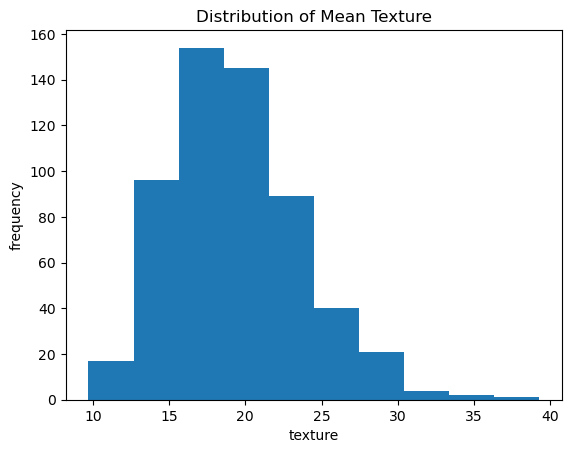

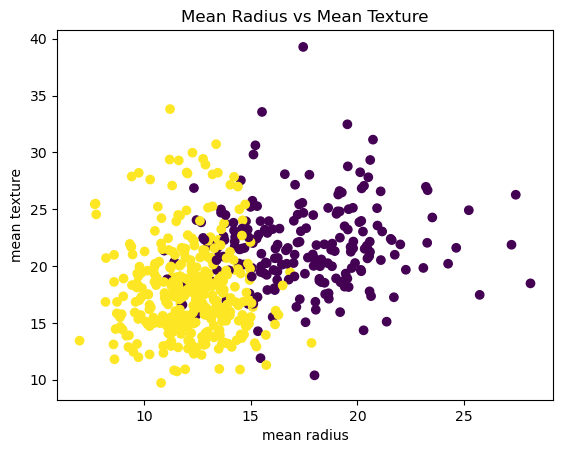

/var/folders/wj/tn1mgntj4nbfdhpy5v1b0gh00000gn/T/ipykernel_36457/557583350.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([area_positive, area_negative], labels=["benign", "malignant"])


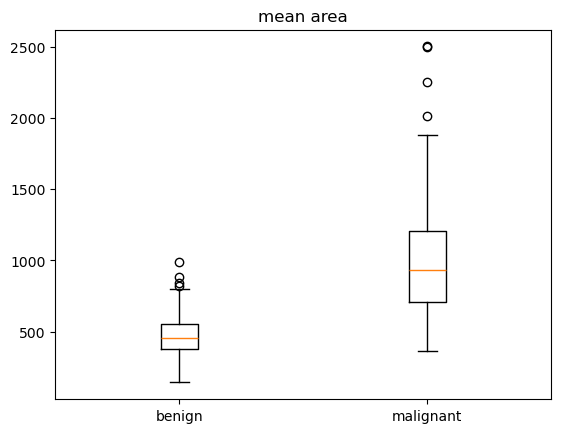

train: 455
test: 114
AUC: 0.9823931623931624
정확도: 0.9385964912280702
혼동 행렬:
 [[34  5]
 [ 2 73]]
분류 리포트:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

최적 하이퍼파라미터: {'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 41}
최고 CV 정확도    : 0.9692307692307691
=== 튜닝 전 모델 성능 ===
정확도: 0.9385964912280702
혼동 행렬:
 [[34  5]
 [ 2 73]]
분류 리포트:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        39
           1       0.94      0.97      0.95        75

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

=== 튜닝 후 모델 성능 ===
정확도: 0.9385964912280702
혼동 행렬:
 [[34

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-e

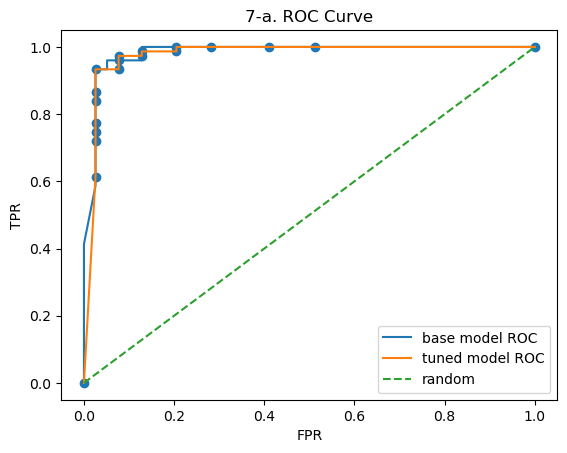

7-b. 각 모델의 AUC 비교
  - base model AUC : 0.982
  - tuned model AUC : 0.976


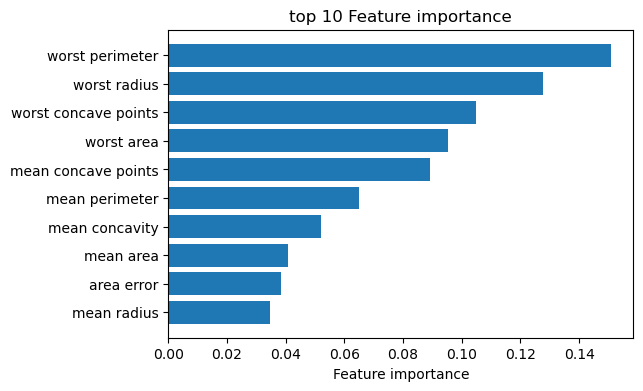

In [6]:
# breast cancer 데이터 불러오기
from sklearn.datasets import load_breast_cancer

# 1. Scikit-learn의 breast cancer의 데이터를 불러오고 summary 확인하기
cancer = load_breast_cancer()
feature_names = cancer.feature_names
# print(feature_names)

# 1-a. 전체 샘플 수와 feature 개수는 각각 몇 개인가요?
# 샘플 수, 특성 수
data = load_breast_cancer().data
num_samples = len(data)  # 569
num_features = len(data[0])  # 30
# print(f"전체 샘플 수: {num_samples}")
# print(f"feature 수: {num_features}")

# 1-b. Target 라벨(양성/악성)의 분포를 확인하세요
# 일반적으로는 malignant가 positive, 1로 표기되는데 여기에서는 benign이 1로 표기됨
target = load_breast_cancer().target
counts = {0: 0, 1: 0}
for t in target:
    counts[t] += 1
# print(f"malignant (0) 샘플 개수: {counts[0]}") 212
# print(f"benign (1) 샘플 개수: {counts[1]}") 357
# print(f"총합(샘플 수): {counts[0] + counts[1]} (전체 샘플 수 n_samples = {n_samples})") 569

# 1-c. 결측 값이 있는 feature가 있는지 확인하세요

missing_count = 0

for row in data:
    for x in row:
        if x is None:
            found_missing = True
            missing_count += 1
"""
found_missing = False
if found_missing:
    print(missing_count)
else:
    print("no missing_count")  # no missing_count

X = data.data  # numpy array지만 리스트처럼 반복 가능

for i, row in enumerate(data):
    for j, feature in enumerate(row):
        if feature is None or str(feature).strip() in ["", "NA", "nan"]:
            print(f"결측값: row {i}, column {j}, value: {feature}")

"""
# 1-d. 평균(mean) 관련 feature들의 기술 통계(describe)를 확인하고 주요 특징을 간단히 요약하세요

# [주요 특징 요약]
# 1. 'mean' 관련 feature들은 세포의 평균적인 특성(반경, 둘레, 면적 등)을 나타냅니다.
# - 크기관련변수(평균 반지름, 둘레, 면적)의 변동성은 상대적으로 큰편.
# - 형태관련변수 (smooth, symm, fractal)은 평균값이 작고 변동성이 적어 데이터가 비교적 균일하고 안정적.
# 2. 각 feature의 'mean' 값은 대체로 양의 값을 가지며, 이는 물리적인 측정값을 나타내기 때문입니다.
# 3. 표준 편차(std)를 통해 각 feature의 값들이 얼마나 퍼져있는지 알 수 있으며, 이는 진단에 중요한 영향을 미칠 수 있습니다.
# 4. 예를 들어, 'radius_mean'은 평균 반경을 나타내며, 이 값이 클수록 악성 종양일 가능성이 높을 수 있습니다.
# 5. 판다스 사용시 describe() 결과에서 각 feature의 최솟값, 최댓값, 25/50/75 백분위수를 통해 값의 분포를 더 상세하게 파악할 수 있습니다.

feature_index = list(feature_names).index("mean radius")
radius = [row[feature_index] for row in data]
# mean_radius = sum(radius) / len(radius)
# min_radius, max_radius = min(radius), max(radius)
# print(sum(radius)) 8038.429000000006
# print(len(radius)) 569
# print(mean_radius) 14.127291739894563
# print(min_radius) 6.981
# print(max_radius) 28.11

# ------------------------------------------------
# 2. 데이터 시각화
import matplotlib.pyplot as plt

# texture
feature_index_texture = list(feature_names).index("mean texture")
texture = [row[feature_index_texture] for row in data]

# 2-a. mean radius, mean texture의 분포를 히스토그램으로 시각화하세요
plt.hist(radius)
plt.title("Distribution of Mean Radius")
plt.xlabel("radius")
plt.ylabel("frequency")
plt.show()

plt.hist(texture)
plt.title("Distribution of Mean Texture")
plt.xlabel("texture")
plt.ylabel("frequency")
plt.show()

# 2-b. mean raidus와 mean texture의 산점도를 그리고, target별로 색깔을 다르게 구분하세요
plt.scatter(radius, texture, c=target)
plt.title("Mean Radius vs Mean Texture")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

# 2-c. target 라벨 별로 mean area의 분포 차이를 박스플롯으로 나타내세요
area_idx = list(feature_names).index("mean area")
area_positive = []  # target == 1 (benign)
area_negative = []  # target == 0 (malignant)
for row, t in zip(data, target):
    if t == 1:
        area_positive.append(row[area_idx])
    else:
        area_negative.append(row[area_idx])

plt.boxplot([area_positive, area_negative], labels=["benign", "malignant"])
plt.title("mean area")
plt.show()

# 3. 머신러닝 데이터 준비
from sklearn.model_selection import train_test_split

# 3-a. 모델링을 위해 학습데이터(Train)과 테스트 데이터(Test)로 나누세요

# 데이터 불러오기
# cancer = load_breast_cancer()

X = cancer.data  # 2차원 숫자 뭉치 569×30
y = cancer.target  # 1차원 숫자 뭉치 569개

# Target size는 20%로 설정하고, random_state는 77로 고정
# random_state=77 → 매번 똑같이 나뉘도록 seed(난수 발생기) 고정
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77
)

print("train:", len(X_train))
print("test:", len(X_test))

# 4. 모델 생성 및 테스트 결과 확인
from sklearn.ensemble import RandomForestClassifier

# 4-a. RandomForestClassifier를 사용하여 Train data를 기반으로 분류 모델을 학습시키세요
# 나무(Decision Tree)를 수십 그루 심어서 숲(Forest)을 만드는 것
# 각 나무가 “이 샘플은 악성인가 양성인가?”를 배우도록 훈련시키는 과정

clf = RandomForestClassifier(random_state=77)
clf.fit(X_train, y_train)

# 4-b. 테스트 데이터에 대해 예측을 수행하고, 아래의 평가지표를 출력하세요 (모델이 얼마나 잘 예측했는지 정밀도, 재현율 평가)
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_curve,
)

# 시험용 데이터 예측
y_pred = clf.predict(X_test)  # 0/1 분류 결과
y_proba = clf.predict_proba(X_test)[:, 1]  # 양성(1)일 확률


# ROC 곡선과 AUC 계산
# ROC 곡선: “확률 기준”을 달리했을 때 TPR과 FPR이 어떻게 변하는지 / AUC: 곡선 아래 면적, 1에 가까울수록 좋음
# fpr:암아닌데 암이라고한 비율, tpr:암이라고 진짜 맞춘비율
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# ROC 그래프 그리기
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
# plt.plot([0, 1], [0, 1], "--")  # 대각선
# plt.xlabel("FPR")  # 거짓 양성 비율
# plt.ylabel("TPR")  # 참 양성 비율
# plt.title("ROC Curve")
# plt.legend(loc="lower right")
# plt.show()

# 정확도(Accuracy): 맞춘 비율(accuracy)을 계산
acc = accuracy_score(y_test, y_pred)
print("정확도:", acc)

# 혼동 행렬(Confusion Matrix)
# 왼쪽 위: 진짜 악성을 악성이라 맞춘 갯수 / 오른쪽 아래: 진짜 양성을 양성이라 맞춘 갯수 / 나머지는 “틀린 경우”

cm = confusion_matrix(y_test, y_pred)
print("혼동 행렬:\n", cm)
# TP  FN
# FN  TP
# TN (True Negative): 실제 암이 아닌데 암 아니라고 예측한 개수
# FP (False Positive): 실제 암이 아닌데 암이라고 예측한 개수
# FN (False Negative): 실제 암인데 암 아니라고 예측한 개수
# TP (True Positive): 실제 암인데 암이라고 예측한 개수


# 분류 리포트(Classification Report)
# Precision(정밀도): “양성이라고 한 것 중 옳은 비율” / Recall(재현율): “진짜 양성 중 맞춘 비율” / F1-score: 두 개를 섞은 종합 점수
print("분류 리포트:\n", classification_report(y_test, y_pred))


# 5. 하이퍼 파라미터 튜닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 5-a. GridSearchCV 또는 RandomizedSearchCV를 사용하여 모델의 하이퍼파라미터를 최적화시키세요
# GridSearchCV
# GridSearchCV는 ‘하나씩 옵션 조합 다 해 보고’ cross-validation(CV) 으로 성능(accuracy)을 비교해서 ‘제일 좋은 옵션’을 찾아줌

# 우리가 비교해 볼 옵션(하이퍼파라미터) 딕셔너리 만들기
param_grid = {
    "n_estimators": list(range(1, 100, 20)),  # 숲 속 나무 개수 옵션
    "max_depth": list(range(1, 10, 2)),  # 나무의 최대 깊이 옵션
    "min_samples_split": list(range(1, 10, 2)),  # 가지를 나눌 최소 샘플 개수 옵션
}

"""
param_grid = {
    "min_samples_leaf": [1, 2, 4],  # 리프 노드의 최소 샘플 수
    "bootstrap": [True, False],  # 부트스트랩 샘플링 여부 기본값은 True
}
"""

# RandomForest 모델과 GridSearchCV 준비

# CV(Cross-Validation) 데이터를 여러 조각(예: 5개)으로 나눠서
# 한 조각씩 번갈아가며 시험용(Test)으로 쓰고 나머지로 학습하는 과정을 반복 모델 성능을 공정하게 평가
# 사람이 하나하나 다 해 보기 힘든 많은 조합을 자동으로 시험해 보고 싶을 때 사용
base_clf = RandomForestClassifier(random_state=77)
grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    cv=5,  # 데이터를 5조각으로 나눠서 5번 검증
    scoring="accuracy",  # 정확도로 제일 높은 옵션을 찾음
)
"""
# estimator=model_for_tuning : 어떤 모델의 핲이퍼파라미터를 튜닝할건지?
# param_grid=param_grid : 위에서 정의한 하이퍼파라미터 그리드를 전달
# cv=5 : 5-fold 교차검증 (훈련 데이터를 5개의 폴드로 나누어 5번의 훈련과 검증을 반복해 모델의 성능을 평가)
# scoring='accuracy' : 모델의 성능을 정확도로 평가
# n_jobs=-1 : 사용 가능한 모든 CPU코어를 사용해 병렬로 계산을 수행하시오
# verbose=1 : 튜닝 진행 상황을 자세히 출력

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,  # 시험할 하이퍼파라미터 목록
    cv=5,  # 5번 나눠서 시험 (교차검증)
    n_jobs=-1,  # 컴퓨터의 모든 코어를 사용해서 빨리 계산
    verbose=1,  # 진행 상황 보여주기
    scoring="accuracy",  # 평가 점수는 정확도로 할게요
)
"""

# 학습 데이터로 옵션별로 모델 학습 및 교차검증
grid.fit(X_train, y_train)

# 가장 좋은 옵션과 그때의 교차검증 정확도 출력
print("최적 하이퍼파라미터:", grid.best_params_)
print("최고 CV 정확도    :", grid.best_score_)


"""
    # RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

# 하이퍼파라미터 후보 정하기 (여러 조합 중에서 랜덤으로 선택해서 테스트)
param_dist = {
    "n_estimators": [50, 100, 200],  # 나무 개수
    "max_depth": [None, 5, 10, 20],  # 나무의 최대 깊이
    "min_samples_split": [2, 5, 10],  # 나뭇가지 나눌 최소 샘플 수
    "min_samples_leaf": [1, 2, 4],  # 끝 잎사귀 노드에 필요한 최소 샘플 수
    "bootstrap": [True, False],  # 샘플을 복원해서 뽑을지 여부
}

# RandomizedSearchCV (랜덤하게 몇 개만 골라서 시험)
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # 랜덤으로 10번 시도해보기
    cv=5,  # 교차검증 (5번 나눠서 평균)
    verbose=2,
    random_state=42,
    n_jobs=-1,  # 가능한 모든 CPU 사용
)

# 학습시키기
random_search.fit(X_train, y_train)

# 최적 파라미터와 최고 점수 출력
print("최적의 하이퍼파라미터(R):", random_search.best_params_)
print("최고 교차검증 정확도(R): {:.4f}".format(random_search.best_score_))
"""

# 6. 최종 모델의 성능 평가
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- a) 튜닝 전 모델로 평가 ---
# 1) 학습
base_clf.fit(X_train, y_train)
# 2) 예측
y_pred_base = base_clf.predict(X_test)
# 3) 지표 출력
print("=== 튜닝 전 모델 성능 ===")
print("정확도:", accuracy_score(y_test, y_pred_base))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_base))
print("분류 리포트:\n", classification_report(y_test, y_pred_base))

# --- b) 튜닝 후 모델로 평가 ---
best_clf = grid.best_estimator_  # GridSearchCV가 찾아준 최적 모델
y_pred_best = best_clf.predict(X_test)

print("=== 튜닝 후 모델 성능 ===")
print("정확도:", accuracy_score(y_test, y_pred_best))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_best))
print("분류 리포트:\n", classification_report(y_test, y_pred_best))

# 7. ROC curve 시각화
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

# 7-a. 기본 모델과 튜닝된 모델에 대해 ROC curve를 모두 시각화하고, 한 그래프에 겹쳐 표현하세요
# 튜닝 전(기본) 모델과 튜닝 후(최적) 모델이 얼마나 잘 구분하는지 /AUC 면적이 크면 클수록 좋음
# strategy
# (1) 두 모델이 양성(1)일 확률을 예측하게 하고(predict_proba)
# (2) roc_curve로 거짓양성비율(FPR)과 참양성비율(TPR)을 계산
# (3) auc로 면적을 계산
# (4) 한 그래프에 두 개의 곡선을 그리고, AUC 값을 범례(legend)에 표시

# --- 7-a. ROC curve 시각화 (기본 모델 vs 튜닝 모델) ---
# 1) 각 모델별로 양성(1)일 확률 예측
y_proba_base = base_clf.predict_proba(X_test)[:, 1]
y_proba_best = best_clf.predict_proba(X_test)[:, 1]

# 2) FPR(False Positive Rate)과 TPR(True Positive Rate) 계산
fpr_base, tpr_base, _ = roc_curve(y_test, y_proba_base)
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)

plt.scatter(fpr_best, tpr_best)
plt.title("ROC curve")
plt.xlabel("FPR(Fall-out)")
plt.ylabel("TPR(Recall)")

# 3) 그래프에 두 ROC curve 그리기
plt.plot(fpr_base, tpr_base, label="base model ROC")
plt.plot(fpr_best, tpr_best, label="tuned model ROC")
plt.plot([0, 1], [0, 1], "--", label="random")  # 대각선
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("7-a. ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 7-b. 각 모델의 AUC를 함께 출력하여 비교하세요
auc_base = auc(fpr_base, tpr_base)
auc_best = auc(fpr_best, tpr_best)

print("7-b. 각 모델의 AUC 비교")
print(f"  - base model AUC : {auc_base:.3f}")
print(f"  - tuned model AUC : {auc_best:.3f}")
# 8. Feature select 진행하기
# 모델이 “어떤 feature가 결정에 제일 중요했는지” 순위를 알아봄 / 상위 10개를 골라서 막대그래프로 보여 주면, 한눈에 어떤 특성이 중요한지 알 수 있음
# strategy
# (1) best_clf.feature_importances_ 에서 특성별 중요도 리스트를 꺼내고
# (2) feature_names 와 짝지어 (이름, 중요도) 튜플 리스트로 만들고
# (3) 중요도 순으로 정렬한 뒤 상위 10개를 선택
# (4) matplotlib의 barh(수평 막대)로 그리기

# 8-a. feature의 중요도를 추출하세요

# 1) 이름과 중요도를 짝지어서 리스트 만들기
importances = best_clf.feature_importances_  # 숫자들
names = list(feature_names)  # 예: ["mean radius", "mean texture", ...]

feat_imp_pairs = list(zip(names, importances))

# 2) 중요도 내림차순 정렬
feat_imp_pairs.sort(key=lambda x: x[1], reverse=True)

# 3) 상위 10개 뽑기
top10 = feat_imp_pairs[:10]
labels = [name for name, imp in top10]
values = [imp for name, imp in top10]

# 8-b. 상위 10개의 중요 feature를 수평 막대 그래프로 시각화하세요 (x축: 중요도 / y축: feature 이름)
# 4) 수평 막대그래프로 시각화
plt.figure(figsize=(6, 4))
plt.barh(labels[::-1], values[::-1])  # 뒤집어서 가장 중요한 게 위에 오도록
plt.xlabel("Feature importance")
plt.title("top 10 Feature importance")
plt.show()

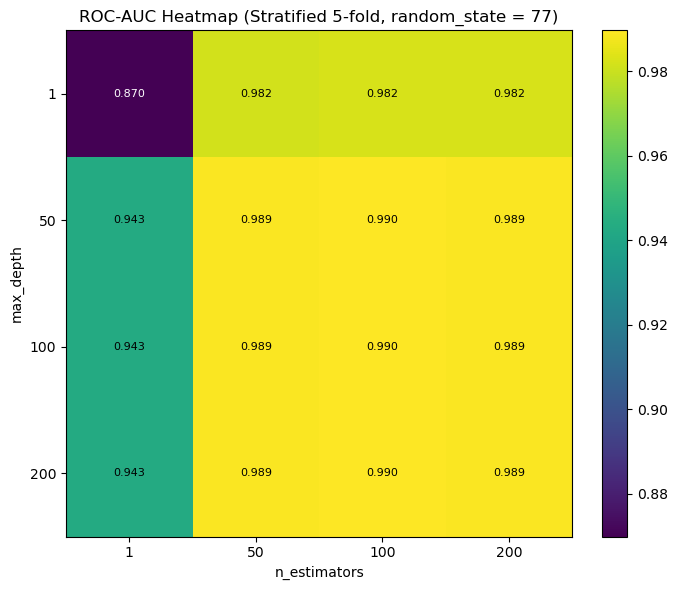

In [3]:
# ----------------------------------------------------------
# 6-e. 하이퍼파라미터 영역 탐색 (n_estimators × max_depth) + 히트맵
# ----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 1) 데이터 ---------------------------------------------------------------
X, y = load_breast_cancer(return_X_y=True)

# 2) 교차검증 분할기 -------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

# 3) 탐색할 값 리스트 ------------------------------------------------------
n_list = [1, 50, 100, 200]      # 열(Columns)  : 트리 개수
d_list = [1, 50, 100, 200]        # 행(Rows)     : 최대 깊이

# 4) 결과 저장용 행렬 (행 = depth, 열 = tree 수) ---------------------------
heat = np.empty((len(d_list), len(n_list)))

for row, depth in enumerate(d_list):
    for col, trees in enumerate(n_list):
        model = RandomForestClassifier(
            n_estimators     = trees,
            max_depth        = depth,
            random_state     = 77,
        )
        # Stratified 5-fold ROC-AUC 평균
        score = cross_val_score(
            model, X, y,
            cv      = cv,
            scoring = "roc_auc",   # 문자열 지정이 가장 안전
            n_jobs  = -1,
        ).mean()
        heat[row, col] = score

# 5) 히트맵 ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(heat, cmap="viridis", origin="upper")

# 축 레이블·눈금
ax.set_xticks(range(len(n_list)))
ax.set_yticks(range(len(d_list)))
ax.set_xticklabels(n_list)               # n_estimators 값
ax.set_yticklabels([str(d) for d in d_list])   # max_depth 값
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")
ax.set_title("ROC-AUC Heatmap (Stratified 5-fold, random_state = 77)")

# 셀마다 점수 표시
for row in range(len(d_list)):
    for col in range(len(n_list)):
        ax.text(
            col, row, f"{heat[row, col]:.3f}",
            ha="center", va="center",
            color="white" if heat[row, col] < 0.90 else "black",
            fontsize=8,
        )

# 컬러바 + 레이아웃
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()
# ----------------------------- (End of 6-e 블록) -----------------------------

In [1]:
# ---------------- 0. 데이터·준비 코드 ----------------
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 0-1) 데이터 로드
cancer = load_breast_cancer()
X = cancer.data          # (n_samples, n_features)
y = cancer.target        # 레이블 벡터

# 0-2) 학습 / 테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=77
)

# 0-3) Feature importance 기반 인덱스 (Top / Bottom)
imp_clf = RandomForestClassifier(random_state=77, n_jobs=-1)
imp_clf.fit(X_train, y_train)

importances   = imp_clf.feature_importances_
indices_desc  = np.argsort(importances)[::-1]      # 중요도 내림차순
indices_asc   = indices_desc[::-1]                # 오름차순
# ---------------------------------------------------

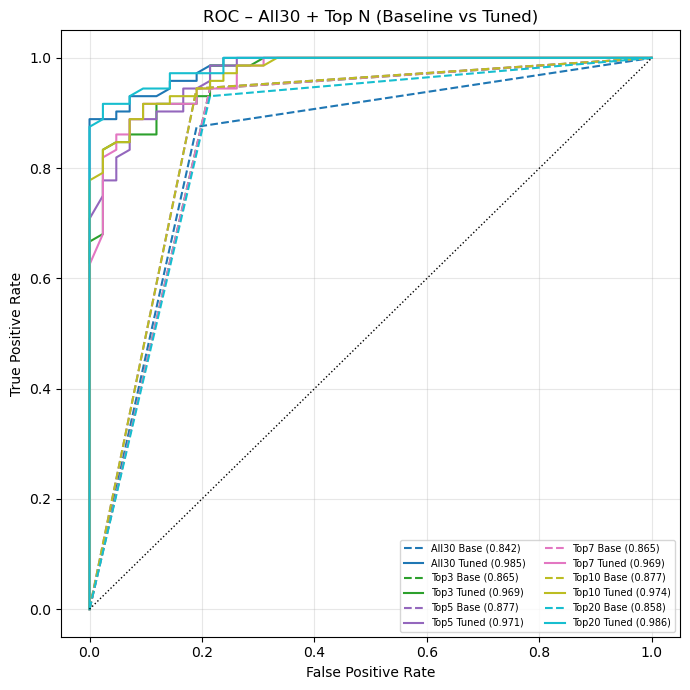

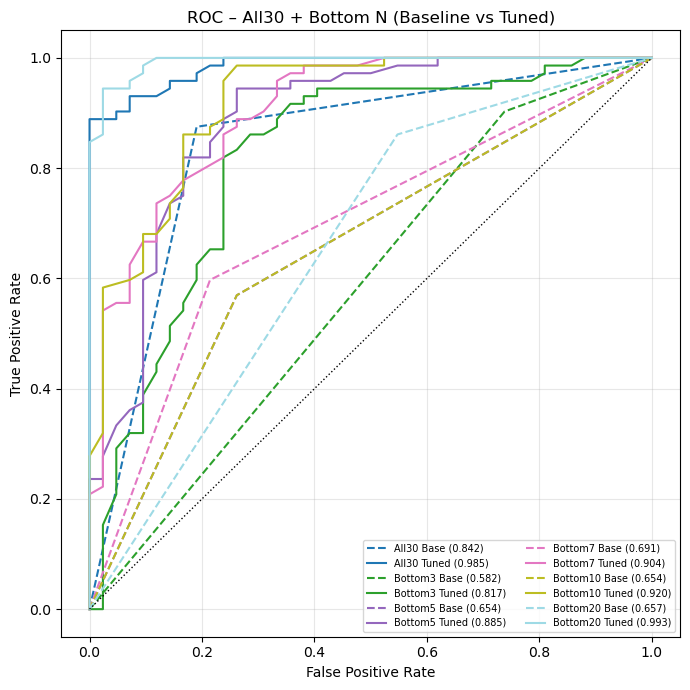

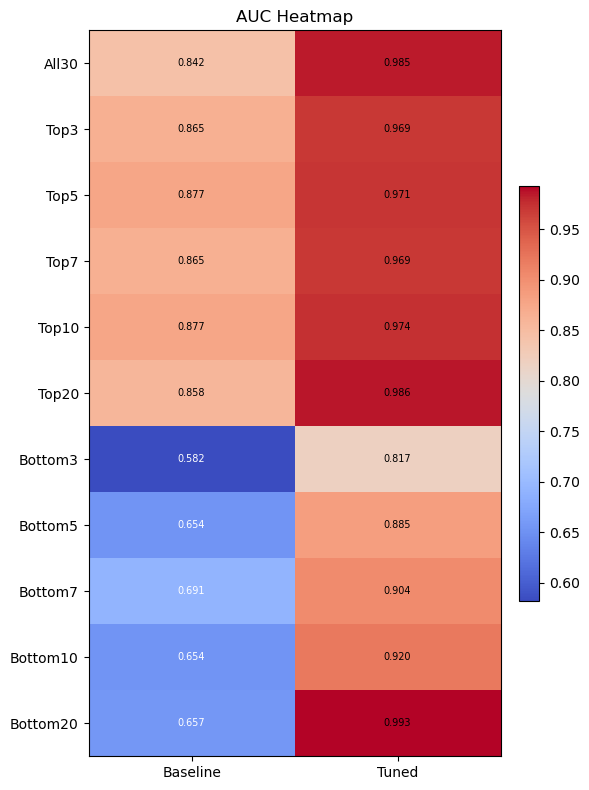

In [2]:
# ----------------------------------------------------------
# 6-g. ROC curve (Baseline & Tuned) + AUC Heatmap
# ----------------------------------------------------------
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ---------- 1) Feature Set 정의 ------------------------------------------
sizes        = [3, 5, 7, 10, 20]
order_labels = ["All30"] \
             + [f"Top{n}"    for n in sizes] \
             + [f"Bottom{n}" for n in sizes]

feature_sets = {
    "All30":     np.arange(X.shape[1]),
    **{f"Top{n}"   : indices_desc[:n] for n in sizes},
    **{f"Bottom{n}": indices_asc[:n]  for n in sizes},
}

# ---------- 2) 두 모델 ----------------------------------------------------
baseline_clf = RandomForestClassifier(
    n_estimators = 1,
    max_depth    = 1,
    random_state = 77,
)
tuned_clf = RandomForestClassifier(
    n_estimators = 100,
    max_depth    = 50,
    random_state = 77,
)



# ---------- 3) ROC 데이터 & AUC 저장 --------------------------------------
roc_base, roc_tuned = {}, {}
auc_mat = np.empty((len(order_labels), 2))  # 열 0=Base, 1=Tuned

for i, label in enumerate(order_labels):
    idx = feature_sets[label]

    # ── 학습
    baseline_clf.fit(X_train[:, idx], y_train)
    tuned_clf.fit(X_train[:, idx], y_train)

    # ── 예측 확률
    pb = baseline_clf.predict_proba(X_test[:, idx])[:, 1]
    pt = tuned_clf.predict_proba(X_test[:, idx])[:, 1]

    # ── ROC
    fpr_b, tpr_b, _ = roc_curve(y_test, pb)
    fpr_t, tpr_t, _ = roc_curve(y_test, pt)
    auc_b, auc_t    = auc(fpr_b, tpr_b), auc(fpr_t, tpr_t)

    roc_base[label]  = (fpr_b, tpr_b, auc_b)
    roc_tuned[label] = (fpr_t, tpr_t, auc_t)
    auc_mat[i]       = [auc_b, auc_t]

# ---------- 4) ROC Curve A : All30 + Top N -------------------------------
top_labels = ["All30"] + [f"Top{n}" for n in sizes]
colors = plt.cm.tab10(np.linspace(0, 1, len(top_labels)))

plt.figure(figsize=(7, 7))
for c, lbl in zip(colors, top_labels):
    fpr_b, tpr_b, A_b = roc_base[lbl]
    fpr_t, tpr_t, A_t = roc_tuned[lbl]
    plt.plot(fpr_b, tpr_b, linestyle="--", color=c,
             label=f"{lbl} Base ({A_b:.3f})")
    plt.plot(fpr_t, tpr_t, linestyle="-",  color=c,
             label=f"{lbl} Tuned ({A_t:.3f})")
plt.plot([0, 1], [0, 1], "k:", lw=1)
plt.title("ROC – All30 + Top N (Baseline vs Tuned)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=7, ncol=2, loc="lower right")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 5) ROC Curve B : All30 + Bottom N ----------------------------
bottom_labels = ["All30"] + [f"Bottom{n}" for n in sizes]
colors = plt.cm.tab20(np.linspace(0, 1, len(bottom_labels)))

plt.figure(figsize=(7, 7))
for c, lbl in zip(colors, bottom_labels):
    fpr_b, tpr_b, A_b = roc_base[lbl]
    fpr_t, tpr_t, A_t = roc_tuned[lbl]
    plt.plot(fpr_b, tpr_b, linestyle="--", color=c,
             label=f"{lbl} Base ({A_b:.3f})")
    plt.plot(fpr_t, tpr_t, linestyle="-",  color=c,
             label=f"{lbl} Tuned ({A_t:.3f})")
plt.plot([0, 1], [0, 1], "k:", lw=1)
plt.title("ROC – All30 + Bottom N (Baseline vs Tuned)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=7, ncol=2, loc="lower right")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 6) AUC Heatmap ----------------------------------------------
fig, ax = plt.subplots(figsize=(6, 8))
im = ax.imshow(auc_mat, cmap="coolwarm", aspect="auto",
               vmin=auc_mat.min(), vmax=auc_mat.max())

ax.set_xticks([0, 1]); ax.set_xticklabels(["Baseline", "Tuned"])
ax.set_yticks(np.arange(len(order_labels))); ax.set_yticklabels(order_labels)
ax.set_title("AUC Heatmap")

best = auc_mat.max()
for r in range(len(order_labels)):
    for c in range(2):
        v = auc_mat[r, c]
        ax.text(c, r, f"{v:.3f}",
                ha="center", va="center",
                color="white" if v < (auc_mat.min()+auc_mat.max())/2 else "black",
                fontsize=7)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout(); plt.show()
# ----------------------------- (End of 6-g 블록) -----------------------------

[LightGBM] [Info] Number of positive: 285, number of negative: 170
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626374 -> initscore=0.516691
[LightGBM] [Info] Start training from score 0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


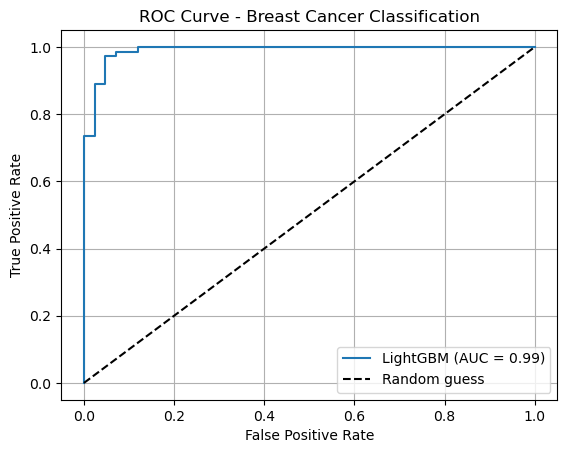

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
data = load_breast_cancer()
X = data.data
y = data.target

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. LGBM 모델 생성 및 학습 (CPU 사용)
model = LGBMClassifier(device='cpu', random_state=42)
model.fit(X_train, y_train)

# 4. 예측 확률 계산
y_score = model.predict_proba(X_test)[:, 1]

# 5. ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 6. 시각화
plt.figure()
plt.plot(fpr, tpr, label=f"LightGBM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Breast Cancer Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


🔹 클래스 분포: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


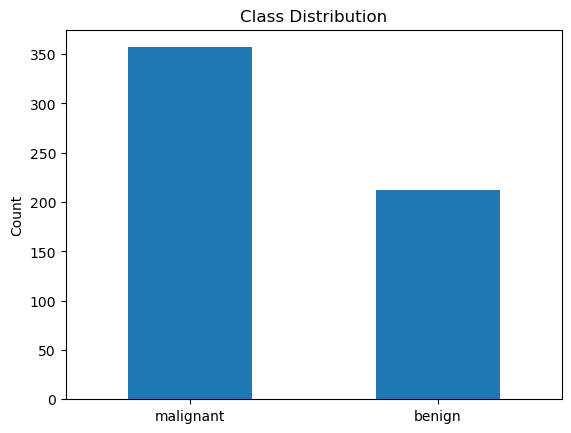

In [4]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# 클래스 분포 확인
unique, counts = np.unique(y, return_counts=True)
class_dist = dict(zip(data.target_names, counts))
print("🔹 클래스 분포:", class_dist)

# 시각화
pd.Series(y).value_counts().plot(kind='bar', xticks=[0, 1])
plt.xticks([0, 1], ['malignant', 'benign'], rotation=0)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()


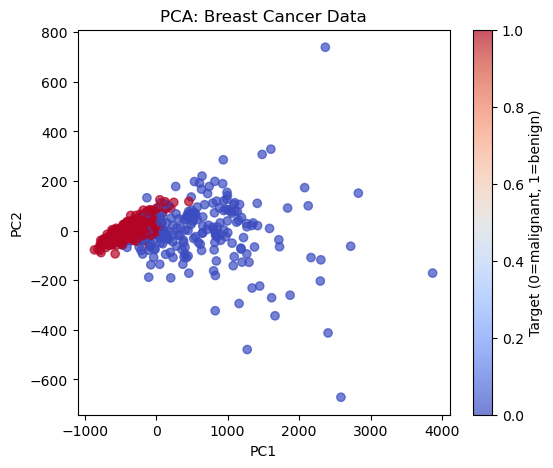

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Breast Cancer Data")
plt.colorbar(label='Target (0=malignant, 1=benign)')
plt.show()

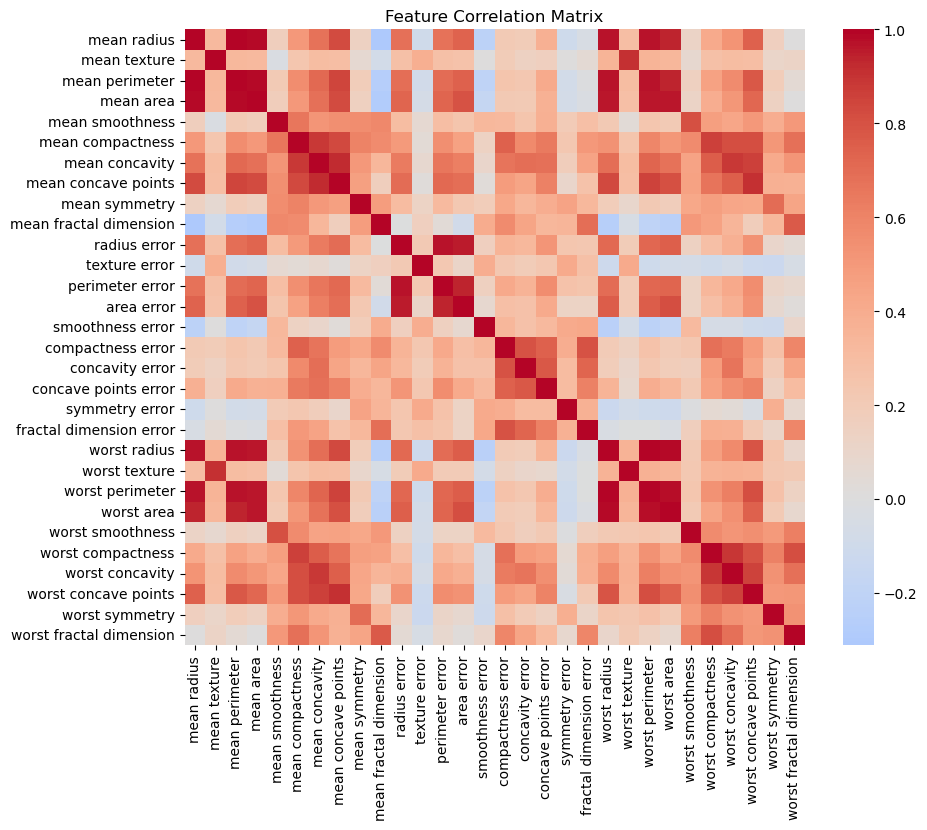

In [ ]:
import seaborn as sns
df = pd.DataFrame(X, columns=data.feature_names)
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()
# 이 히트맵은 "의미 있는 상관관계가 많이 존재하며, 구조적으로 잘 정리된 데이터"임을 보여줍니다.
# 랜덤하거나 혼란스러운 패턴이 없고, 강한 상관 그룹이 명확하게 나타나므로 노이즈가 적은 편입니다.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
scores = cross_val_score(model, X, y, cv=5)

print("🔹 로지스틱 회귀 평균 정확도:", scores.mean())
# 만약 로지스틱 회귀로도 90% 이상 정확도가 나온다면,
# 고차원 비선형 모델 없이도 잘 맞는 → 즉, noise가 적고 분류가 잘 되는 구조일 가능성이 높음

🔹 로지스틱 회귀 평균 정확도: 0.9507995652848935
